# Статистические методы. ДЗ3

***Автор: Лосевской Артём***

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [42]:
data = pd.read_csv("experiment_lesson_4.csv")
df = data.copy()
df

,order_id,delivery_time,district,experiment_group
0,3159,44.0,Purlieus,control
1,10426,51.0,Purlieus,control
2,9155,46.0,Purlieus,control
3,10699,34.0,Purlieus,control
4,10061,43.0,Purlieus,control
...,...,...,...,...
20191,14561,42.0,Suburb,test
20192,12015,32.0,Suburb,test
20193,20077,23.0,Purlieus,test
20194,14861,41.0,Central,test


## Гистограммы распределения времени доставки

In [43]:
df[df['experiment_group'] == 'test']['delivery_time']

10092    38.0
10093    31.0
10094    39.0
10095    29.0
10096    31.0
         ... 
20191    42.0
20192    32.0
20193    23.0
20194    41.0
20195    41.0
Name: delivery_time, Length: 10104, dtype: float64

Text(0.5, 1.0, 'Test')

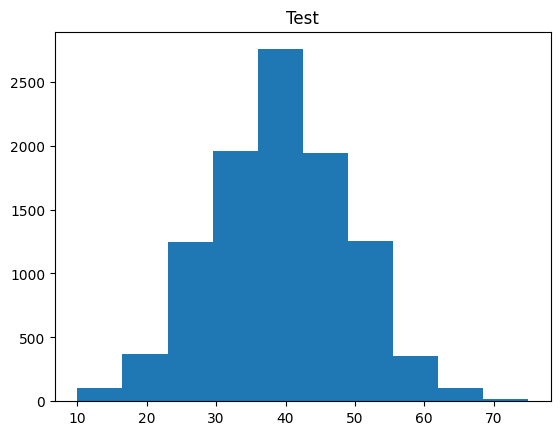

In [44]:
plt.hist(x=df[df['experiment_group'] == 'test']['delivery_time'])
plt.title('Test')

Text(0.5, 1.0, 'Control')

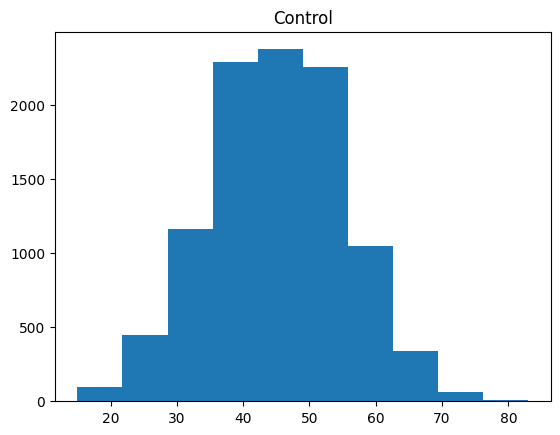

In [45]:
plt.hist(x=df[df['experiment_group'] == 'control']['delivery_time'])
plt.title('Control')

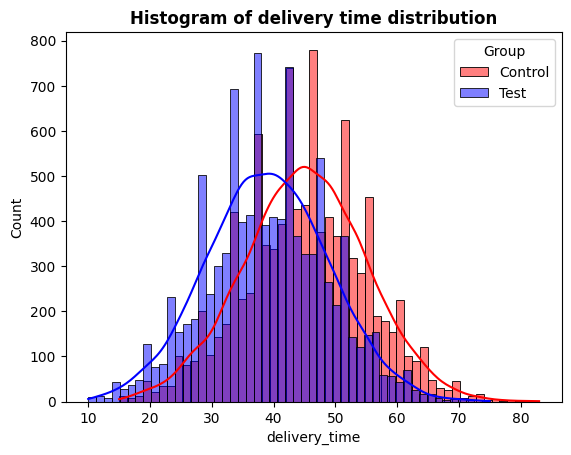

In [46]:
sns.histplot(df[df['experiment_group'] == 'control']['delivery_time'], kde = True, color='red', label='Control')
sns.histplot(df[df['experiment_group'] == 'test']['delivery_time'], kde = True, color='blue', label='Test') #Treatment
plt.title(f'Histogram of delivery time distribution', weight='bold')
plt.legend(title='Group')
plt.show()

## На сколько по модулю отличается количество наблюдений в тесте и контроле?

In [81]:
df.groupby('experiment_group')['order_id'].count()

experiment_group
control    10092
test       10104
Name: order_id, dtype: int64

In [82]:
n_control = df[df['experiment_group'] == 'control'].shape[0]
n_test = df[df['experiment_group'] == 'test'].shape[0]
n_control - n_test

-12

## Проверим выполнение условий на нормальность и посчитаем стандартное отклонение в тесте и в контроле.

### Тест Шапиро-Уилка

In [49]:
delivery_time_test = df[df['experiment_group'] == 'test']['delivery_time']
delivery_time_control = df[df['experiment_group'] == 'control']['delivery_time']

In [51]:
ss.shapiro(delivery_time_test)

c:\Users\gloze\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10104.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.998619400911751, pvalue=1.0739047798223119e-07)

In [52]:
ss.shapiro(delivery_time_control)

c:\Users\gloze\AppData\Local\Programs\Python\Python39\lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10092.
  res = hypotest_fun_out(*samples, **kwds)


ShapiroResult(statistic=0.9987088244953138, pvalue=2.8099019608930565e-07)

### Тест Агостино-Пирсона

In [61]:
res_control = ss.normaltest(delivery_time_control, nan_policy='omit')
res_control

NormaltestResult(statistic=0.25349755437872584, pvalue=0.8809549607809654)

In [72]:
res_test = ss.normaltest(delivery_time_test, nan_policy='omit')
res_test

NormaltestResult(statistic=7.024157092641915, pvalue=0.02983483685333173)

In [76]:
import pingouin as pg
pg.normality(delivery_time_control, method='normaltest')

,W,pval,normal
delivery_time,0.253498,0.880955,True


В контрольной группе распределение нормальное

In [75]:
pg.normality(delivery_time_test, method='normaltest')

,W,pval,normal
delivery_time,7.024157,0.029835,False


В тестовой группе распределение не является нормальным

## Стандартные отклонения

### Контроль

In [112]:
control_std = delivery_time_control.std().round(2)
control_std

9.99

### Тест

In [113]:
test_std = delivery_time_test.std().round(2)
test_std 

9.88

## Сравнение средних (подсчёт статистики)

Двухвыборочный т-критерий Стьюдента с независимыми выборками:

$T = \dfrac{\bar{X}-\bar{Y}}{\sqrt{\frac{s^2_x}{n_x}+\frac{s^2_y}{n_y}}}$

$H_0: E(test) = E(control)$

In [116]:
test_mean = delivery_time_test.mean()
control_mean = delivery_time_control.mean()
s2_test = delivery_time_test.var()
s2_control = delivery_time_control.var()
T = (test_mean - control_mean) / np.sqrt(s2_test / n_test + s2_control / n_control)
print(f'Значение статистики: {T:.0f}')

Значение статистики: -43


In [110]:
#s2_test, test_std ** 2

## Процентное изменение среднего времени доставки в тесте по сравнению с контролем

In [102]:
percentage_change = (test_mean - control_mean) / control_mean * 100
print(f'Среднее время доставки в тестовой группе по сравнению с контрольной изменилось на {percentage_change:.2f}%')

Среднее время доставки в тестовой группе по сравнению с контрольной изменилось на -13.35%


## Вывод

Значение статистики уже посчитали

In [121]:
k = (s2_test / n_test + s2_control / n_control) ** 2 / ((s2_test / n_test ) ** 2 / (n_test - 1) + (s2_control / n_control) ** 2 / (n_control - 1)) #df
k

20191.127787584755

Берём 20191. Получим приближенно стандартное нормальное распредление.

In [122]:
t = ss.t(20191) #t-распредление с соответствующим числом степеней свободы
F_T = t.cdf(T)
print(f't-statistic = {T:.3f}, p-value = {min(2*(1-F_T),2*F_T):.3f}') #двусторонняя гипотеза

t-statistic = -43.036, p-value = 0.000


Итак, два формата:

- **Научный**: значение тестовой статистики не попадает в доверительную область для любого разумного уровня занчимости (=попадает в критическую). P-value также меньше любого разумного уровня значимости. 

    Следовательно, нулевая гипотеза отвергается в пользу альтернативной.

- **Понятный**: полученные нами данные свидетельствуют, что время доставки в группе, где аналитики применили алгоритм, действительно отличается от времени доставки в группе, где алгоритм применен не был. Другими словами, алгоритм оказал влияние на время доставки (если бы была односторонняя гипотеза $E(test) < E(control)$, то сказали бы, что есть значительные свидетельства полагать, что алгоритм сокращает время доставки, но выше я сформулировал в соответствии с нашей альтернативной гипотезой)